## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})


In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay


for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


In [4]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [5]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 110]

#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


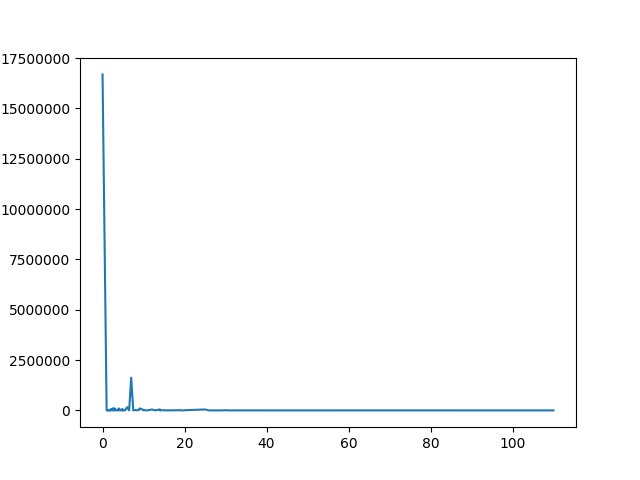

In [11]:
%matplotlib notebook
google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) # apps with multiple genres are not in this top


paid_apps = google_play_store[google_play_store['price'] != 0.0]
df1 = paid_apps.groupby("price").mean()
df2 = google_play_store.groupby("price").mean()
plt.ticklabel_format(style='plain')
plt.plot(df2.index, df2['installs'])

In [7]:
apple_store.groupby("price").mean()

,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
price,,,,,,,,,
0.0,147935700.2,19749.8,569.4,3.4,3.1,37.4,3.6,5.7,1.0
1.0,134093923.2,7145.7,620.4,3.5,3.2,38.7,3.3,3.9,1.0
2.0,121020046.8,3811.9,207.3,3.7,3.6,37.7,3.6,4.9,1.0
3.0,210957063.4,2805.5,224.9,3.9,3.7,37.8,4.1,6.4,1.0
4.0,215814290.8,1660.6,141.6,3.8,3.5,37.5,4.1,4.9,1.0
5.0,363488763.5,3242.2,399.4,3.8,3.6,36.2,4.3,5.3,1.0
6.0,306584891.1,926.2,67.3,3.4,3.1,35.5,4.2,2.7,1.0
7.0,909375388.3,5458.4,267.0,4.0,3.9,33.0,4.8,5.2,1.0
8.0,580049299.4,4266.9,90.3,3.5,2.9,35.8,3.9,6.3,0.9


In [8]:
pd.set_option('display.max_rows', None)
